###Dataset
In this Notebook, we will be working with the dataset ['Spanish Arilines Tweets Sentiment Analysis'](https://www.kaggle.com/c/spanish-arilines-tweets-sentiment-analysis/data?select=tweets_public.csv)


In [6]:
import pandas as pd

df = pd.read_csv('/content/tweets_public.csv')[['airline_sentiment','text']]
df_text = df[['text']]
df_text.head()

,text
0,Trabajar en #Ryanair como #TMA: https://t.co/r...
1,@Iberia @FIONAFERRER Cuando gusten en Cancún s...
2,Sabiais que @Iberia te trata muy bien en santi...
3,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...
4,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...


In [7]:
import re
df_text['text'] = df_text['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df_text.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text
0,Trabajar en #Ryanair como #TMA:
1,@Iberia @FIONAFERRER Cuando gusten en Cancún s...
2,Sabiais que @Iberia te trata muy bien en santi...
3,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...
4,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...


#Word Embeddings


                                                                                




##W2V 
Word2vec is an unsupervised methodology for building word embeddings. In the
Word2vec architecture, an attempt is made to do either of the following:


*   Predicting the context word using the target word as input, which is referred to
as the Skip-gram method.
*   Predicting the target word using the context words as input, which is referred to
as the Continuous Bag-of-Words (CBOW) method.

CBOW is faster and has better representation for **more frequent words**. On the other hand,  Skipgram works well with **small amount of data** and is found to represent rare words well.







###Skipgram Model
Given a large training corpus represented as a sequence of words
$w_1, ..., w_T$ , the objective of the Skip-gram model is to maximize the following log-likelihood:

$ \sum_{t=1}^t \sum_{c \in C_t}^n log( p(w_c | w_t))$.

where the context $C_t$ is the set of indices of words surrounding word $w_t$

Dealing with performance:
- Negative Sampling
- Hierarchial softmax


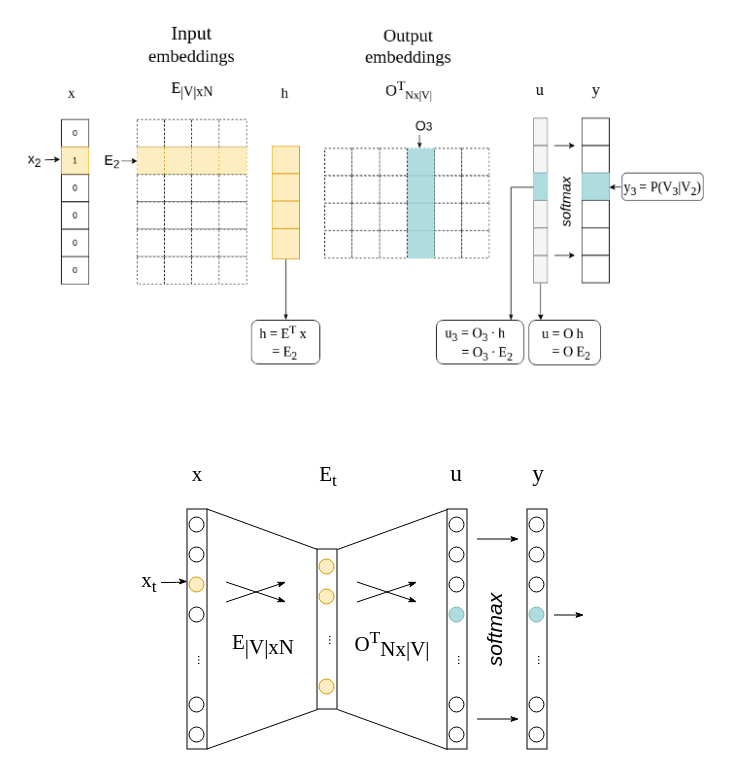

This model tries to predict the source context words (surrounding words) given a target word (the center word).But how we can train the model to know what is contextual and what is not?

Skip-gram model is trained with negative sampling as it is faster and works better for frequent words. Negative samples are selected randomly based on smoothed unigram distribution.

Negative sampling: The idea behind negative sampling is instead of doing softmax function and multiclass cross-entrop that is computationally expensive, do sigmoid function and binary cross-entropy over some positive and negative samples. Negative sampling distribution is used to choose negative samples. Unigram distribution is the porbability of a single word occuring. The problem with this distribution is that infrequent words are too infrequent so they are very unlikely to be sampled.


Source:
https://arxiv.org/pdf/1310.4546.pdf

In [1]:
#Cleaning the dataset with the data_cleaning's methods
!pip3 install -r requirements.txt
!python -m spacy download en_core_web_sm
import data_cleaning.spanish as sp

     |████████████████████████████████| 432 kB 5.2 MB/s 
     |████████████████████████████████| 13.7 MB 16.1 MB/s 
     |████████████████████████████████| 6.0 MB 32.9 MB/s 
     |████████████████████████████████| 628 kB 35.0 MB/s 
     |████████████████████████████████| 181 kB 13.2 MB/s 
     |████████████████████████████████| 42 kB 711 kB/s 
     |████████████████████████████████| 10.1 MB 27.6 MB/s 
     |████████████████████████████████| 451 kB 31.2 MB/s 
     |████████████████████████████████| 174 kB 44.4 MB/s 
     |████████████████████████████████| 5.9 MB 33.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=6dcd9be880015b6c3fb0f3d27e830c5aa2d6106696f1a50471db5fa31278f2f5
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully unin

2022-02-18 13:19:58 INFO: Downloading default packages for language: es (Spanish)...


2022-02-18 13:20:14 INFO: Finished downloading models and saved to /root/stanza_resources.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
print(df_text.text.tolist())

['Trabajar en #Ryanair como #TMA: ', '@Iberia @FIONAFERRER Cuando gusten en Cancún se viaja y disfruta de manera sin igual', 'Sabiais que @Iberia te trata muy bien en santiago de chile?Te cambia el asiento,te manda a volar en el wc trasero,e… ', 'NUNCA NUNCA NUNCA pidáis el café de Ryanair.\nBueno, nada que vendan a bordo.', '@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFGoodrichEU @BurgosTur @ASTIntlogistics @Uremovil @karbium Muchos éxito… ', '@mgd_1970 Wow que bonito , yo solo he volado unas 3 o 4 veces en un 747 de @Iberia y siempre fue a tu tierra :)', 'Iberia Plus cumple 25 años. Queremos celebrarlo contigo de una manera muy especial. Elige tu número favorito y... ¡… ', 'Barómetro #Business: Iberia (57%) y Vueling (61%) son las compañías aéreas más utilizadas en los #viajes de… ', '@Iberia Felicitaciones IBERIA!', '@cbellolio @Iberia @NuevoPudahuel Chuata, yo tengo un Madrid - Stgo en un par de semanas. Habrá que cruzar los dedos!', 'Disponibilidad aérea Internacional en los sigui

In [9]:
cleaned_doc,entities = sp.corpus(dataset=df_text.text.tolist()[0:1000])

In [10]:
print(f'cleaned sentence: {cleaned_doc}')

cleaned sentence: [['trabajar', 'ryanair', 'tma'], ['iberia', 'fionaferrer', 'gustar', 'cancun', 'viajar', 'disfruto', 'manera', 'igual'], ['sabiais', 'iberia', 'tratar', 'bien', 'santiago', 'chile', '?', 'cambiar', 'asiento', 'mandar', 'volar', 'wc', 'trasero'], ['nunca', 'nunca', 'nunca', 'pidai', 'cafir', 'ryanair', 'bueno', 'vendar', 'bordo'], ['cris_tortu', 'dakar', 'iberio', 'mitsubishi_es', 'bfgoodricheu', 'burgostur', 'astintlogistics', 'uremovil', 'karbium', 'exito'], ['mgd_1970', 'wow', 'bonito', 'solo', 'volar', 'uno', '3', '4', 'vez', '747', 'iberio', 'siempre', 'tierrar'], ['iberio', 'plus', 'cumplir', '25', 'ano', 'querer', 'celebrar', 'él', 'contigo', 'manera', 'especial', 'elegir', 'numero', 'favorito'], ['barometro', 'business', 'iberio', '57', 'vueling', '61', 'compania', 'aerea', 'utilizado', 'viaje'], ['iberio', 'felicitación', 'iberio'], ['cbellolio', 'iberio', 'nuevopudahuel', 'chuata', 'madrid', 'stgo', 'par', 'semana', 'cruzar', 'dedo'], ['disponibilidad', 'aere

In [11]:
txt_joined = [" ".join(words_list) for words_list in cleaned_doc]

Creating vocabulary with keras tokenizer

In [12]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(txt_joined)
print(tokenizer.word_index.items())
V = len(tokenizer.word_index.items()) + 1
V

dict_items([('iberio', 1), ('iberia', 2), ('ryanair', 3), ('vuelo', 4), ('hacer', 5), ('destino', 6), ('hola', 7), ('él', 8), ('madrid', 9), ('poder', 10), ('solo', 11), ('si', 12), ('ano', 13), ('mejor', 14), ('ir', 15), ('gracias', 16), ('huelga', 17), ('suerte', 18), ('precio', 19), ('asi', 20), ('2', 21), ('avion', 22), ('espana', 23), ('europeo', 24), ('esperar', 25), ('q', 26), ('volar', 27), ('click', 28), ('deseadme', 29), ('79', 30), ('piloto', 31), ('querer', 32), ('pasajero', 33), ('viaje', 34), ('nuevo', 35), ('ser', 36), ('hora', 37), ('maleta', 38), ('ver', 39), ('video', 40), ('billete', 41), ('primero', 42), ('viajar', 43), ('spanair', 44), ('accidente', 45), ('5022', 46), ('decada', 47), ('buen', 48), ('vueling', 49), ('holaargentín', 50), ('letal', 51), ('dias', 52), ('numero', 53), ('hoy', 54), ('web', 55), ('pues', 56), ('salir', 57), ('iberiaexpress', 58), ('aeropuerto', 59), ('llegar', 60), ('dar', 61), ('vez', 62), ('siempre', 63), ('yo', 64), ('dejar', 65), ('eq

3185

In [13]:
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

In [14]:
vocab_inv = {v:k for k,v in tokenizer.word_index.items()} # index:word

In [15]:
from keras.preprocessing.text import text_to_word_sequence
wids = [[tokenizer.word_index[w] for w in text_to_word_sequence(doc)] for doc in txt_joined]

Defining the model with Keras API

In [19]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input
from keras.layers.merge import Dot

dim_embeddings = 300

# inputs
w_inputs = Input(shape=(1, ), dtype='int32')
w = Embedding(V, dim_embeddings)(w_inputs)

# context
c_inputs = Input(shape=(1, ), dtype='int32')
c  = Embedding(V, dim_embeddings)(c_inputs)
o = Dot(axes=2)([w, c])
o = Reshape((1,), input_shape=(1, 1))(o)
o = Activation('sigmoid')(o)

SkipGram = Model(inputs=[w_inputs, c_inputs], outputs=o)
SkipGram.summary()
SkipGram.compile(loss='binary_crossentropy', optimizer='adam')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 300)       955500      ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 300)       955500      ['input_4[0][0]']                
                                                                                            

Training the model

In [21]:
from keras.preprocessing.sequence import skipgrams 
import numpy as np
for _ in range(10):
    loss = 0.
    for i, doc in enumerate(tokenizer.texts_to_sequences(txt_joined)):
        data, labels = skipgrams(sequence=doc, vocabulary_size=V, window_size=10, negative_samples=5.)
        x = [np.array(x) for x in zip(*data)]
        y = np.array(labels, dtype=np.int32)
        if x:
            loss += SkipGram.train_on_batch(x, y)
    print('Epoch:', _, 'Loss:', loss)

Epoch: 0 Loss: 285.7907296959311
Epoch: 1 Loss: 259.4419551938772
Epoch: 2 Loss: 230.3301003240049
Epoch: 3 Loss: 202.89466886222363
Epoch: 4 Loss: 176.1108677033335
Epoch: 5 Loss: 154.9601700026542
Epoch: 6 Loss: 137.33570946007967
Epoch: 7 Loss: 124.53591588418931
Epoch: 8 Loss: 114.78649916639552
Epoch: 9 Loss: 108.24110192945227


In [22]:
# generate skip-grams
skip_grams = [skipgrams(doc, vocabulary_size=V, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          vocab_inv[pairs[i][0]], pairs[i][0], 
          vocab_inv[pairs[i][1]], pairs[i][1], 
          labels[i]))

(regresion (3180), resp (1453)) -> 0
(población (3181), spanair (44)) -> 0
(aun (211), 50 (733)) -> 1
(cazar (3183), sisones (3182)) -> 1
(seguir (84), menu (1032)) -> 0
(seguir (84), viajero (181)) -> 0
(especie (1018), morir (1021)) -> 1
(aun (211), fiumicino (2351)) -> 0
(ser (36), especie (1018)) -> 1
(50 (733), población (3181)) -> 1


For testing the model, you should use gensim library

In [23]:
#creating a file 
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(V-1, dim_embeddings))
vectors = SkipGram.get_weights()[0]

#saving the model
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [24]:
vectors.shape

(3185, 300)

In [27]:
import gensim
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [28]:
w2v.most_similar(positive=['aerolinea'])

[('united', 0.6475836038589478),
 ('brintanico', 0.6424441337585449),
 ('militar', 0.6411882638931274),
 ('which', 0.6402204036712646),
 ('javidevicalvaro', 0.6398419141769409),
 ('consultor', 0.638207197189331),
 ('podriar', 0.6253478527069092),
 ('eta', 0.6230988502502441),
 ('mej', 0.6205241680145264),
 ('scratchcard', 0.6083890199661255)]

In [47]:
w2v.most_similar(positive=['asiento'])

[('onboardhd', 0.5766171813011169),
 ('asignarte', 0.5738050937652588),
 ('aguilar', 0.5663213729858398),
 ('adolfo', 0.5572023391723633),
 ('rata', 0.5394083261489868),
 ('12a', 0.5234017968177795),
 ('pago', 0.5032325983047485),
 ('estrategia', 0.5013359785079956),
 ('cheking', 0.4998058080673218),
 ('javi1773', 0.495636910200119)]

In [31]:
w2v.wv.syn0 #input embedding layer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


array([[ 0.23735556,  0.08750146,  0.06609469, ...,  0.31167027,
        -0.01584194, -0.01453534],
       [ 0.08350447, -0.11288133,  0.07711085, ...,  0.16701826,
        -0.05931887, -0.00712712],
       [ 0.07473651,  0.00631823,  0.12146453, ...,  0.12898442,
         0.0391652 ,  0.00677711],
       ...,
       [ 0.06670287,  0.14497305,  0.11404983, ...,  0.0543503 ,
        -0.04114248,  0.00268978],
       [ 0.05667315,  0.12678888,  0.00231362, ...,  0.04004372,
        -0.0131401 , -0.01753841],
       [ 0.05479115,  0.09487188,  0.07556407, ..., -0.00622872,
        -0.06822809,  0.02731514]], dtype=float32)

####Visualization
t-SNE: T-distributed Stochastic Neighbor Embedding (t-SNE) is a machine learning algorithm for visualization technique well-suited for embedding high-dimensional data into two or three dimensions. It reduces the dimensionality of data while it preserves the structure of data.

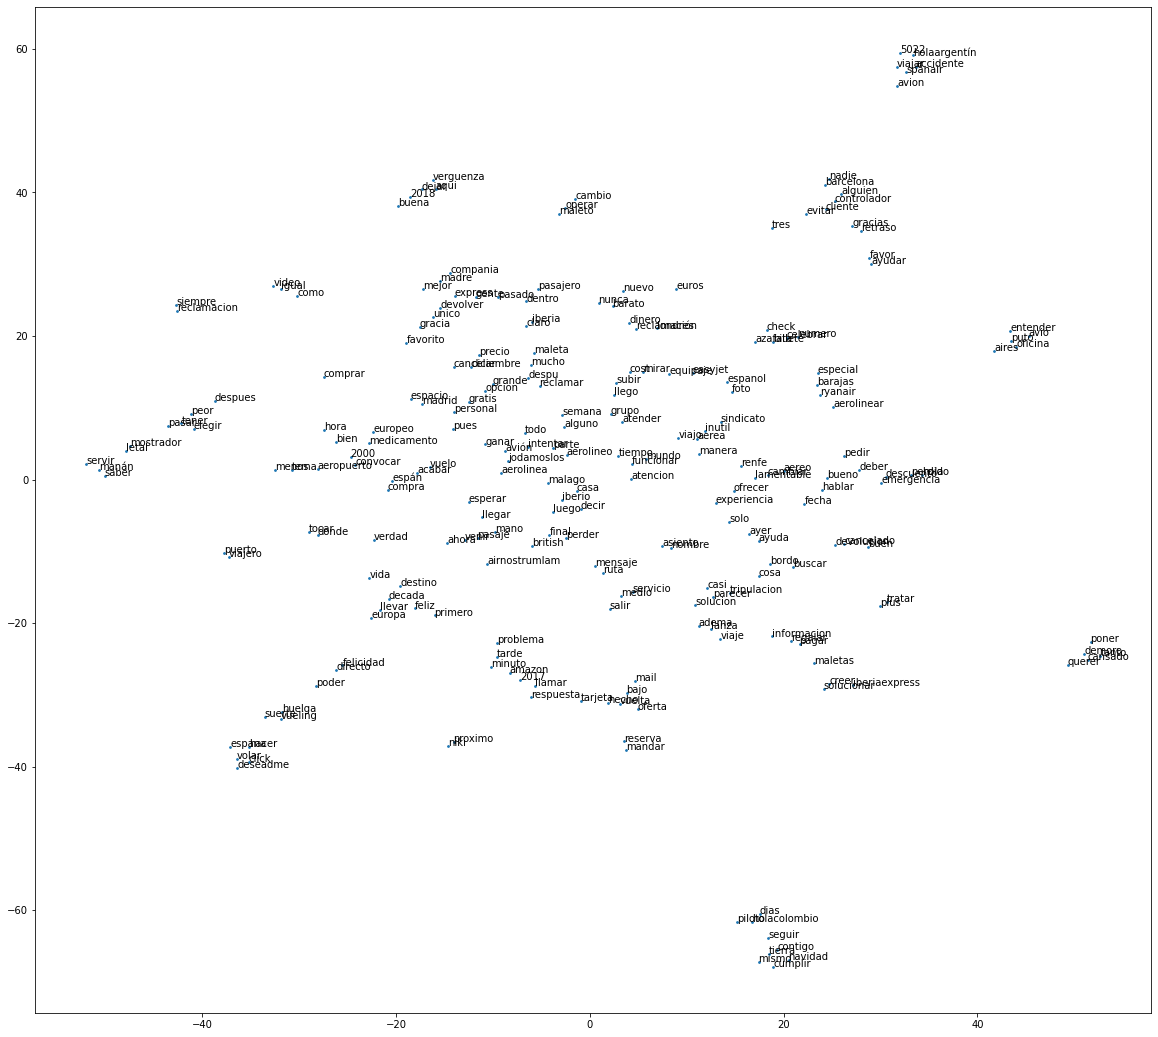

In [37]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

n_plot = 300
mft = [vocab_inv[elt] for elt in range(1,n_plot+1)]

keep_idxs = [idx for idx,elt in enumerate(mft) if len(elt)>3]
mft = [mft[idx] for idx in keep_idxs]
keep_ints = [list(range(1,n_plot+1))[idx] for idx in keep_idxs]
Wt_freq = w2v.wv.syn0[keep_ints,]

my_pca = PCA(n_components=20)
my_tsne = TSNE(n_components=2,perplexity=5)
                         
my_pca_fit = my_pca.fit_transform(Wt_freq)
my_tsne_fit = my_tsne.fit_transform(my_pca_fit)

fig, ax = plt.subplots()
ax.scatter(my_tsne_fit[:,0], my_tsne_fit[:,1],s=3)
for x,y,token in zip(my_tsne_fit[:,0],my_tsne_fit[:,1],mft):
    ax.annotate(token, xy=(x,y), size=10)

fig.set_size_inches(20,18.5)
fig.savefig('word_embeddings.pdf',dpi=300)
fig.show()

###CBOW Model

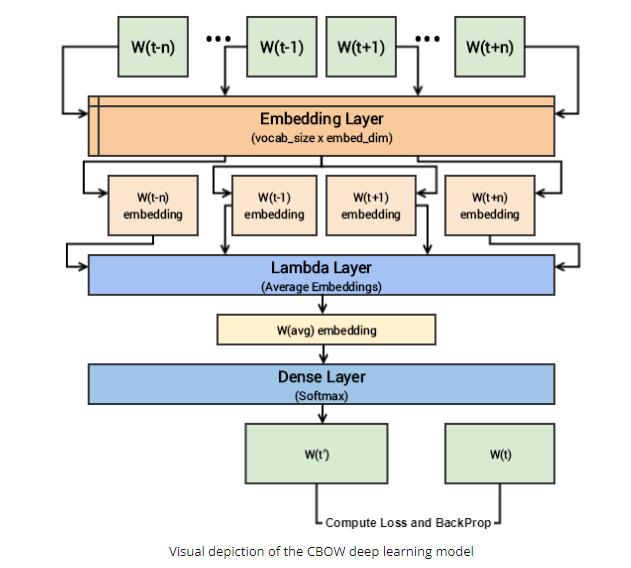

The fake task in CBOW is somewhat similar to Skip-gram, in the sense that we still take a pair of words and teach the model that they co-occur but instead of adding the errors we add the input words for the same target word.
The dimension of our hidden layer and output layer will remain the same. Only the dimension of our input layer and the calculation of hidden layer activations will change, if we have 4 context words for a single target word, we will have 4 1xV input vectors. Each will be multiplied with the VxE hidden layer returning 1xE vectors. All 4 1xE vectors will be averaged element-wise to obtain the final activation which then will be fed into the softmax layer.

In [ ]:
import tensorflow as tf

In [42]:
corpus = txt_joined

In [51]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import tensorflow as tf

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
X_train_tokens = tokenizer.texts_to_sequences(corpus)
items = tokenizer.word_index.items()
word2id = tokenizer.word_index
id2word = dict([(value, key) for (key, value) in word2id.items()])
vocab_size = len(word2id) + 1
vocab_size

embed_size = 300
window_size = 2
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])   
            
            label_word.append(word)

            x = pad_sequences(context_words, maxlen=context_length)
            y = to_categorical(label_word, vocab_size)
            yield (x, y)
i = 0
for x, y in generate_context_word_pairs(corpus=X_train_tokens, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['iberia', 'fionaferrer', 'cancun', 'viajar'] -> Target (Y): gustar
Context (X): ['fionaferrer', 'gustar', 'viajar', 'disfruto'] -> Target (Y): cancun
Context (X): ['gustar', 'cancun', 'disfruto', 'manera'] -> Target (Y): viajar
Context (X): ['cancun', 'viajar', 'manera', 'igual'] -> Target (Y): disfruto
Context (X): ['sabiais', 'iberia', 'bien', 'santiago'] -> Target (Y): tratar
Context (X): ['iberia', 'tratar', 'santiago', 'chile'] -> Target (Y): bien
Context (X): ['tratar', 'bien', 'chile', 'cambiar'] -> Target (Y): santiago
Context (X): ['bien', 'santiago', 'cambiar', 'asiento'] -> Target (Y): chile
Context (X): ['santiago', 'chile', 'asiento', 'mandar'] -> Target (Y): cambiar
Context (X): ['chile', 'cambiar', 'mandar', 'volar'] -> Target (Y): asiento
Context (X): ['cambiar', 'asiento', 'volar', 'wc'] -> Target (Y): mandar


In [53]:
from keras.layers import Embedding, Dense, Lambda
import keras.backend as K

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embed_size,
                   embeddings_initializer='glorot_uniform',
                   input_length=window_size*2))
model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
model.add(Dense(vocab_size, kernel_initializer='glorot_uniform', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 4, 300)            955500    
                                                                 
 lambda_2 (Lambda)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 3185)              958685    
                                                                 
Total params: 1,914,185
Trainable params: 1,914,185
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
n_epochs = 5
for epoch in range(n_epochs):
    loss = 0
    for x, y in generate_context_word_pairs(corpus=X_train_tokens, window_size=window_size, vocab_size=vocab_size):
      loss += model.train_on_batch(x, y)

    print('Epoch:', epoch, '\tLoss:', loss)

Epoch: 0 	Loss: 68538.60004602373
Epoch: 1 	Loss: 55648.70626632392
Epoch: 2 	Loss: 45898.554790443304
Epoch: 3 	Loss: 35554.67818104215
Epoch: 4 	Loss: 25746.85343995833


In [55]:
weights = model.get_weights()[0]
weights = weights[1:]
print(weights.shape)

(3184, 300)


###Pretrain W2V
A brief example of a pre train w2v using the API provided by Gensim. 

The model is pre trained with [spanish datasets](https://github.com/dccuchile/spanish-word-embeddings) 

In [67]:
!pip install wget

In [4]:
import gensim
import gensim.downloader as api
from gensim.models import KeyedVectors

In [66]:
import wget
wget.download('http://cs.famaf.unc.edu.ar/~ccardellino/SBWCE/SBW-vectors-300-min5.txt.bz2')

'SBW-vectors-300-min5.txt (1).bz2'

In [68]:
wv = gensim.models.KeyedVectors.load_word2vec_format('/content/SBW-vectors-300-min5.txt.bz2', binary=False)

In [69]:
wv.vector_size

300

In [70]:
len(wv.vocab)

1000653

In [73]:
result = wv.most_similar(positive=['hombre', 'reina'], negative=['rey'], topn=5)
print(result)

[('mujer', 0.7475311756134033), ('joven', 0.6321573257446289), ('fémina', 0.6205989122390747), ('jovencita', 0.6140977740287781), ('muchacha', 0.5765562653541565)]


####**Biased in Word Vectors**

Machine learning models have an air of "fairness" about them, since models make decisions without human intervention. However, models can and do learn whatever bias is present in the training data.
In this example we will use the google news dataset.


In [1]:
!git clone https://github.com/mmihaltz/word2vec-GoogleNews-vectors

Cloning into 'word2vec-GoogleNews-vectors'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [8]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [9]:
result = wv.most_similar(positive=['computer_programmer', 'woman'], negative=['man'], topn=2)
print(result)

[('homemaker', 0.5627118945121765), ('housewife', 0.5105047225952148)]


In [11]:
wv.most_similar(positive=['nurse', 'he'], negative=['she'], topn=1)

[('doctor', 0.5559605360031128)]

#Sources
* https://www.tensorflow.org/tutorials/text/word2vec
* https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html
* https://radimrehurek.com/gensim/models/word2vec.html
* https://github.com/dccuchile/spanish-word-embeddings